## CLT

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def normal_distribution(sample_size, number_of_samples, mu=mu, sigma=sigma):
    return [np.mean(np.random.normal(mu, sigma, sample_size)) for _ in range(number_of_samples)]
    
fig,ax = Weid_Fig(rows=1, widths=3, height=4, dpi=400)

sample_size = 100
number_of_samples = 10000
mu, sigma = 0, 1 # we know the mean and standard deviation
normal_sample_means = normal_distribution(sample_size, number_of_samples, mu=mu, sigma=sigma)

ax.hist(normal_sample_means, bins=50, density=True, alpha=0.6, color='royalblue')

x = np.linspace(min(normal_sample_means), max(normal_sample_means), 100)

mu_sample = np.mean(normal_sample_means)
sigma_sample = np.std(normal_sample_means)
plt.plot(x, norm.pdf(x, mu_sample, sigma_sample), 'r', label='Normal Distribution')

plt.title(f'Normal Distribution | Sample Mean | Sample Size = {sample_size}')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()


NameError: name 'mu' is not defined

## Confidence Intervals

Since the CLT tells us the sampling distribution, we can assign probabilities to any range of events. 

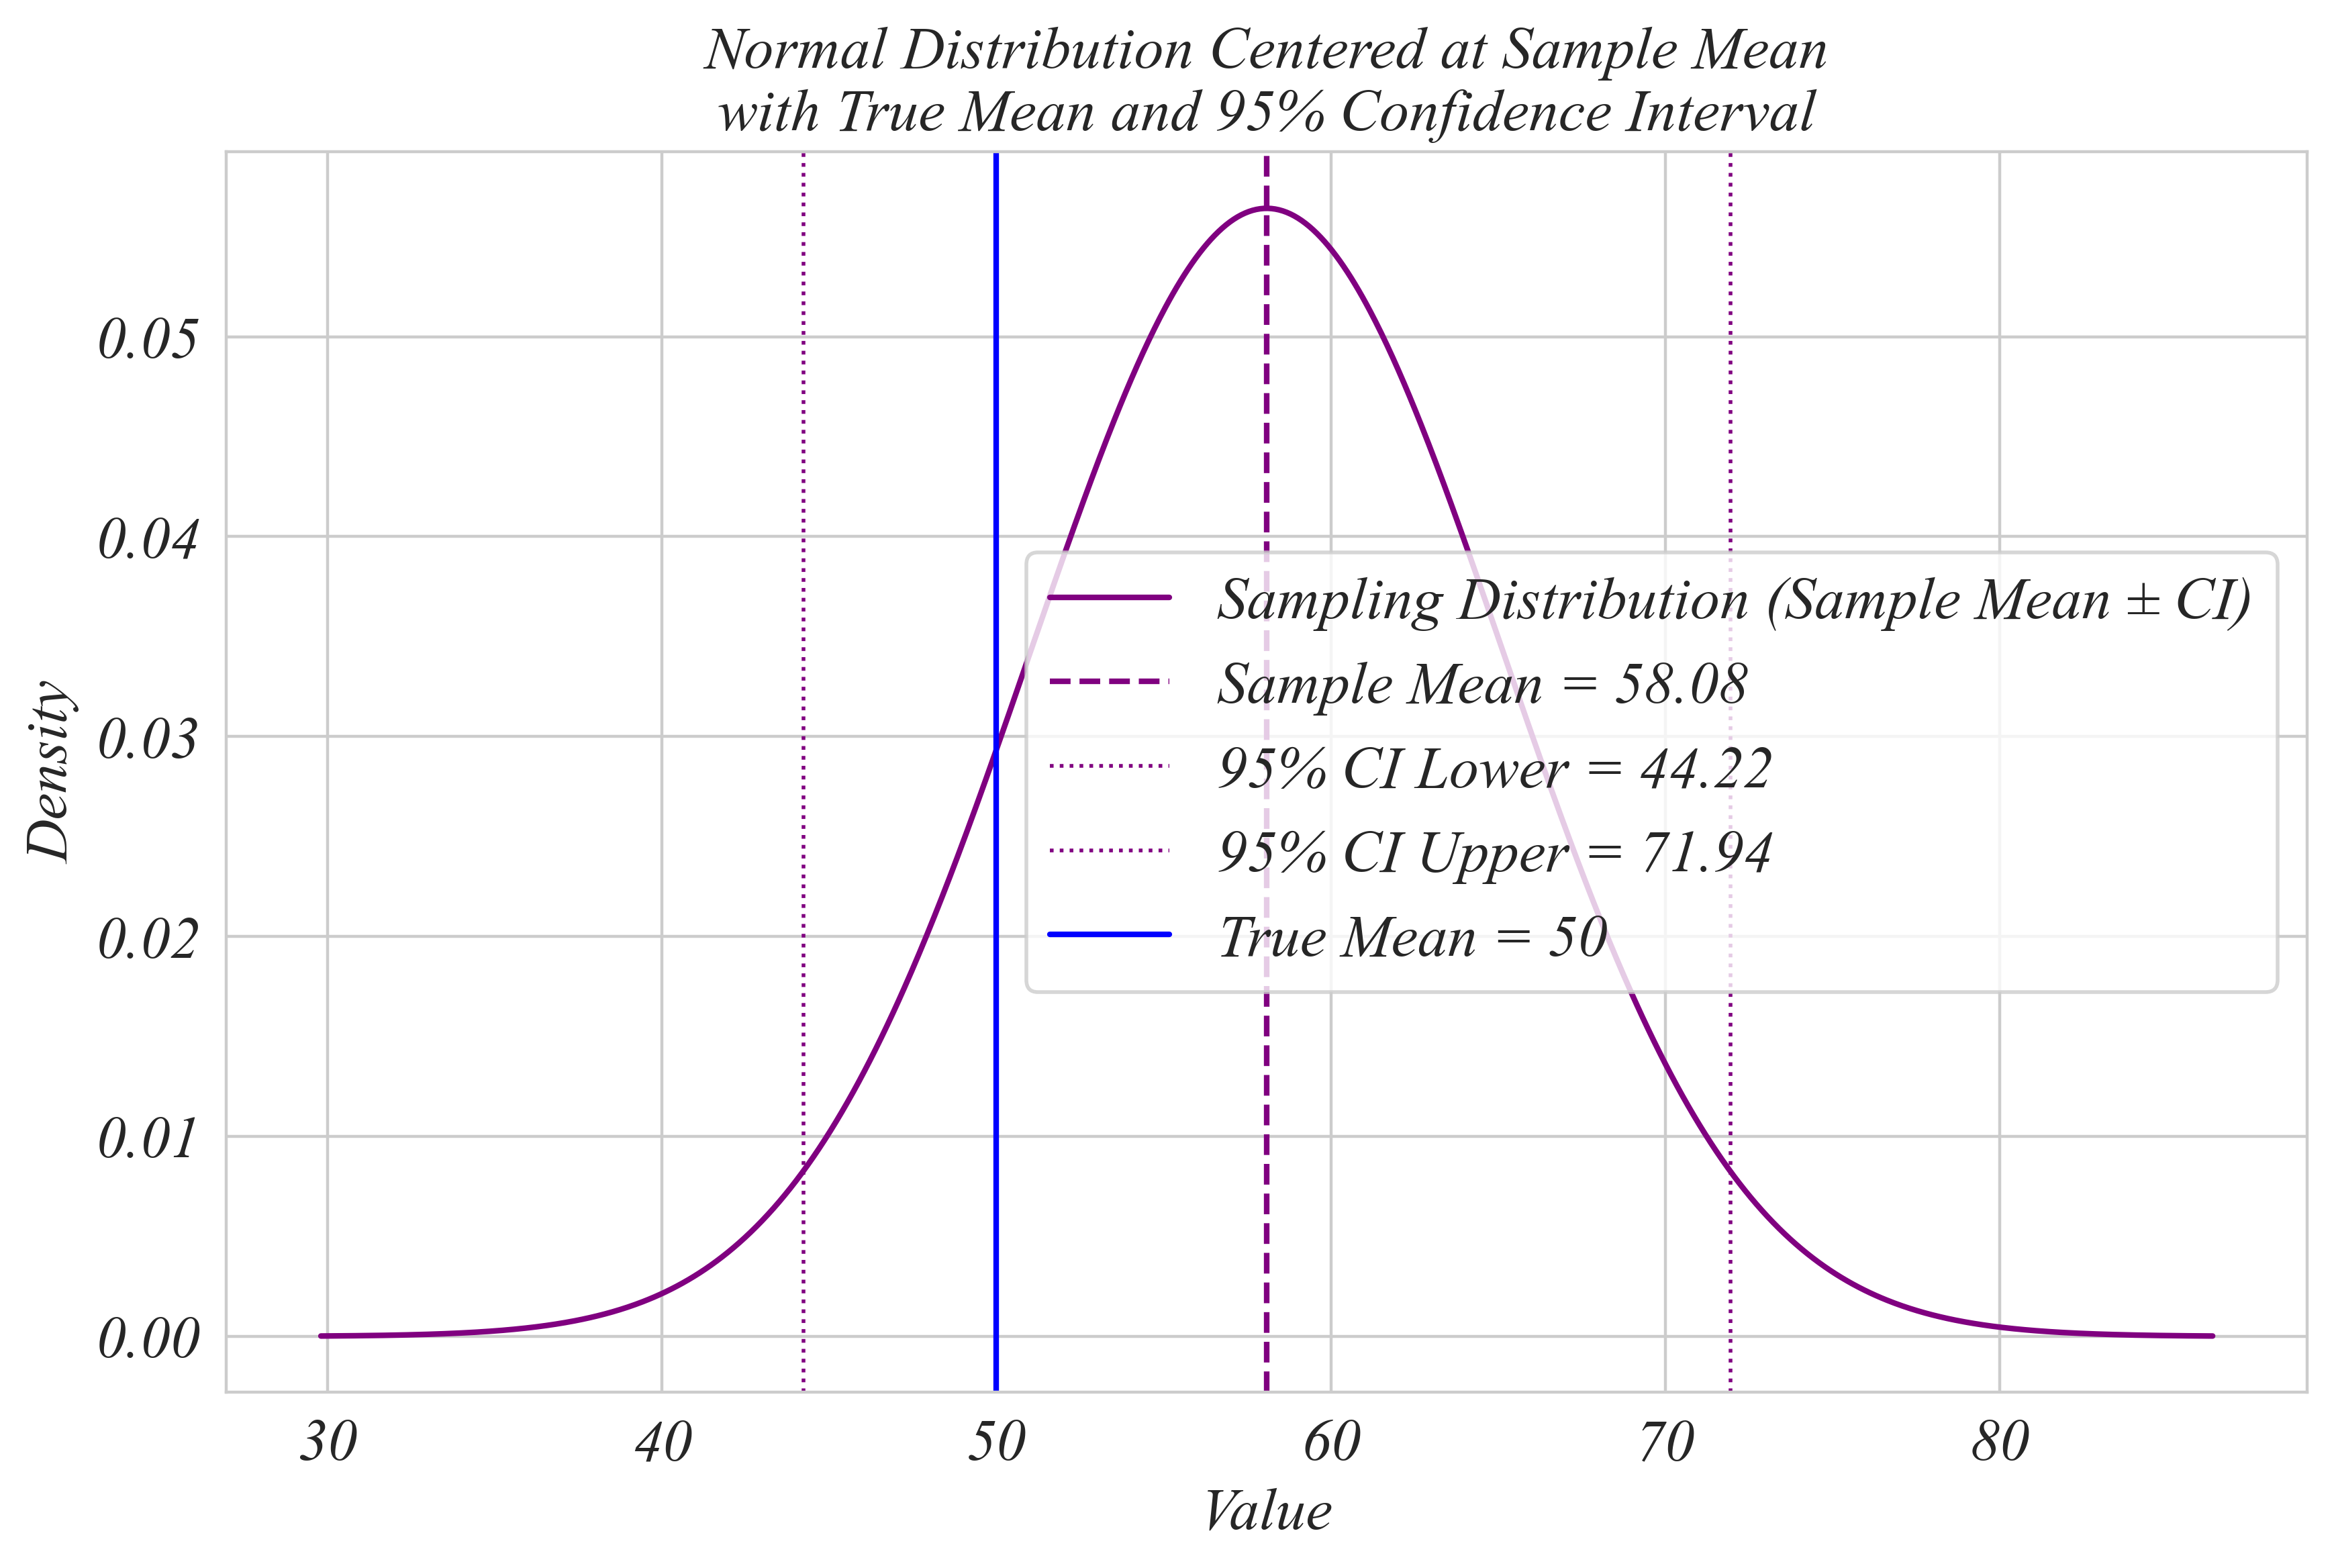

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
population_mean = 50
population_std = 10
sample_size = 2
confidence_level = 0.95
z_score = 1.96  # Approximate Z-score for a 95% confidence level

# Take a single sample and calculate the sample mean and standard error
sample = np.random.normal(population_mean, population_std, sample_size)
sample_mean = np.mean(sample)
sample_std_error = population_std / np.sqrt(sample_size)

# Generate x values for the normal distribution centered around the sample mean
x_values = np.linspace(sample_mean - 4*sample_std_error, sample_mean + 4*sample_std_error, 1000)
y_values = norm.pdf(x_values, sample_mean, sample_std_error)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the normal distribution around the sample mean
plt.plot(x_values, y_values, label="Sampling Distribution (Sample Mean ± CI)", color="purple")

# Mark the sample mean and confidence interval bounds
lower_bound = sample_mean - z_score * sample_std_error
upper_bound = sample_mean + z_score * sample_std_error
plt.axvline(sample_mean, color="purple", linestyle="--", label=f'Sample Mean = {sample_mean:.2f}')
plt.axvline(lower_bound, color="purple", linestyle=":", linewidth=1, label=f'95% CI Lower = {lower_bound:.2f}')
plt.axvline(upper_bound, color="purple", linestyle=":", linewidth=1, label=f'95% CI Upper = {upper_bound:.2f}')

# Mark the true population mean
plt.axvline(population_mean, color="blue", linestyle="-", label=f'True Mean = {population_mean}', linewidth=1.5)

# Labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Normal Distribution Centered at Sample Mean\nwith True Mean and 95% Confidence Interval")
plt.legend()
plt.show()

## Two Tails

For example, we can give probabilities to unlikely events. Let's plot the probabilities of 

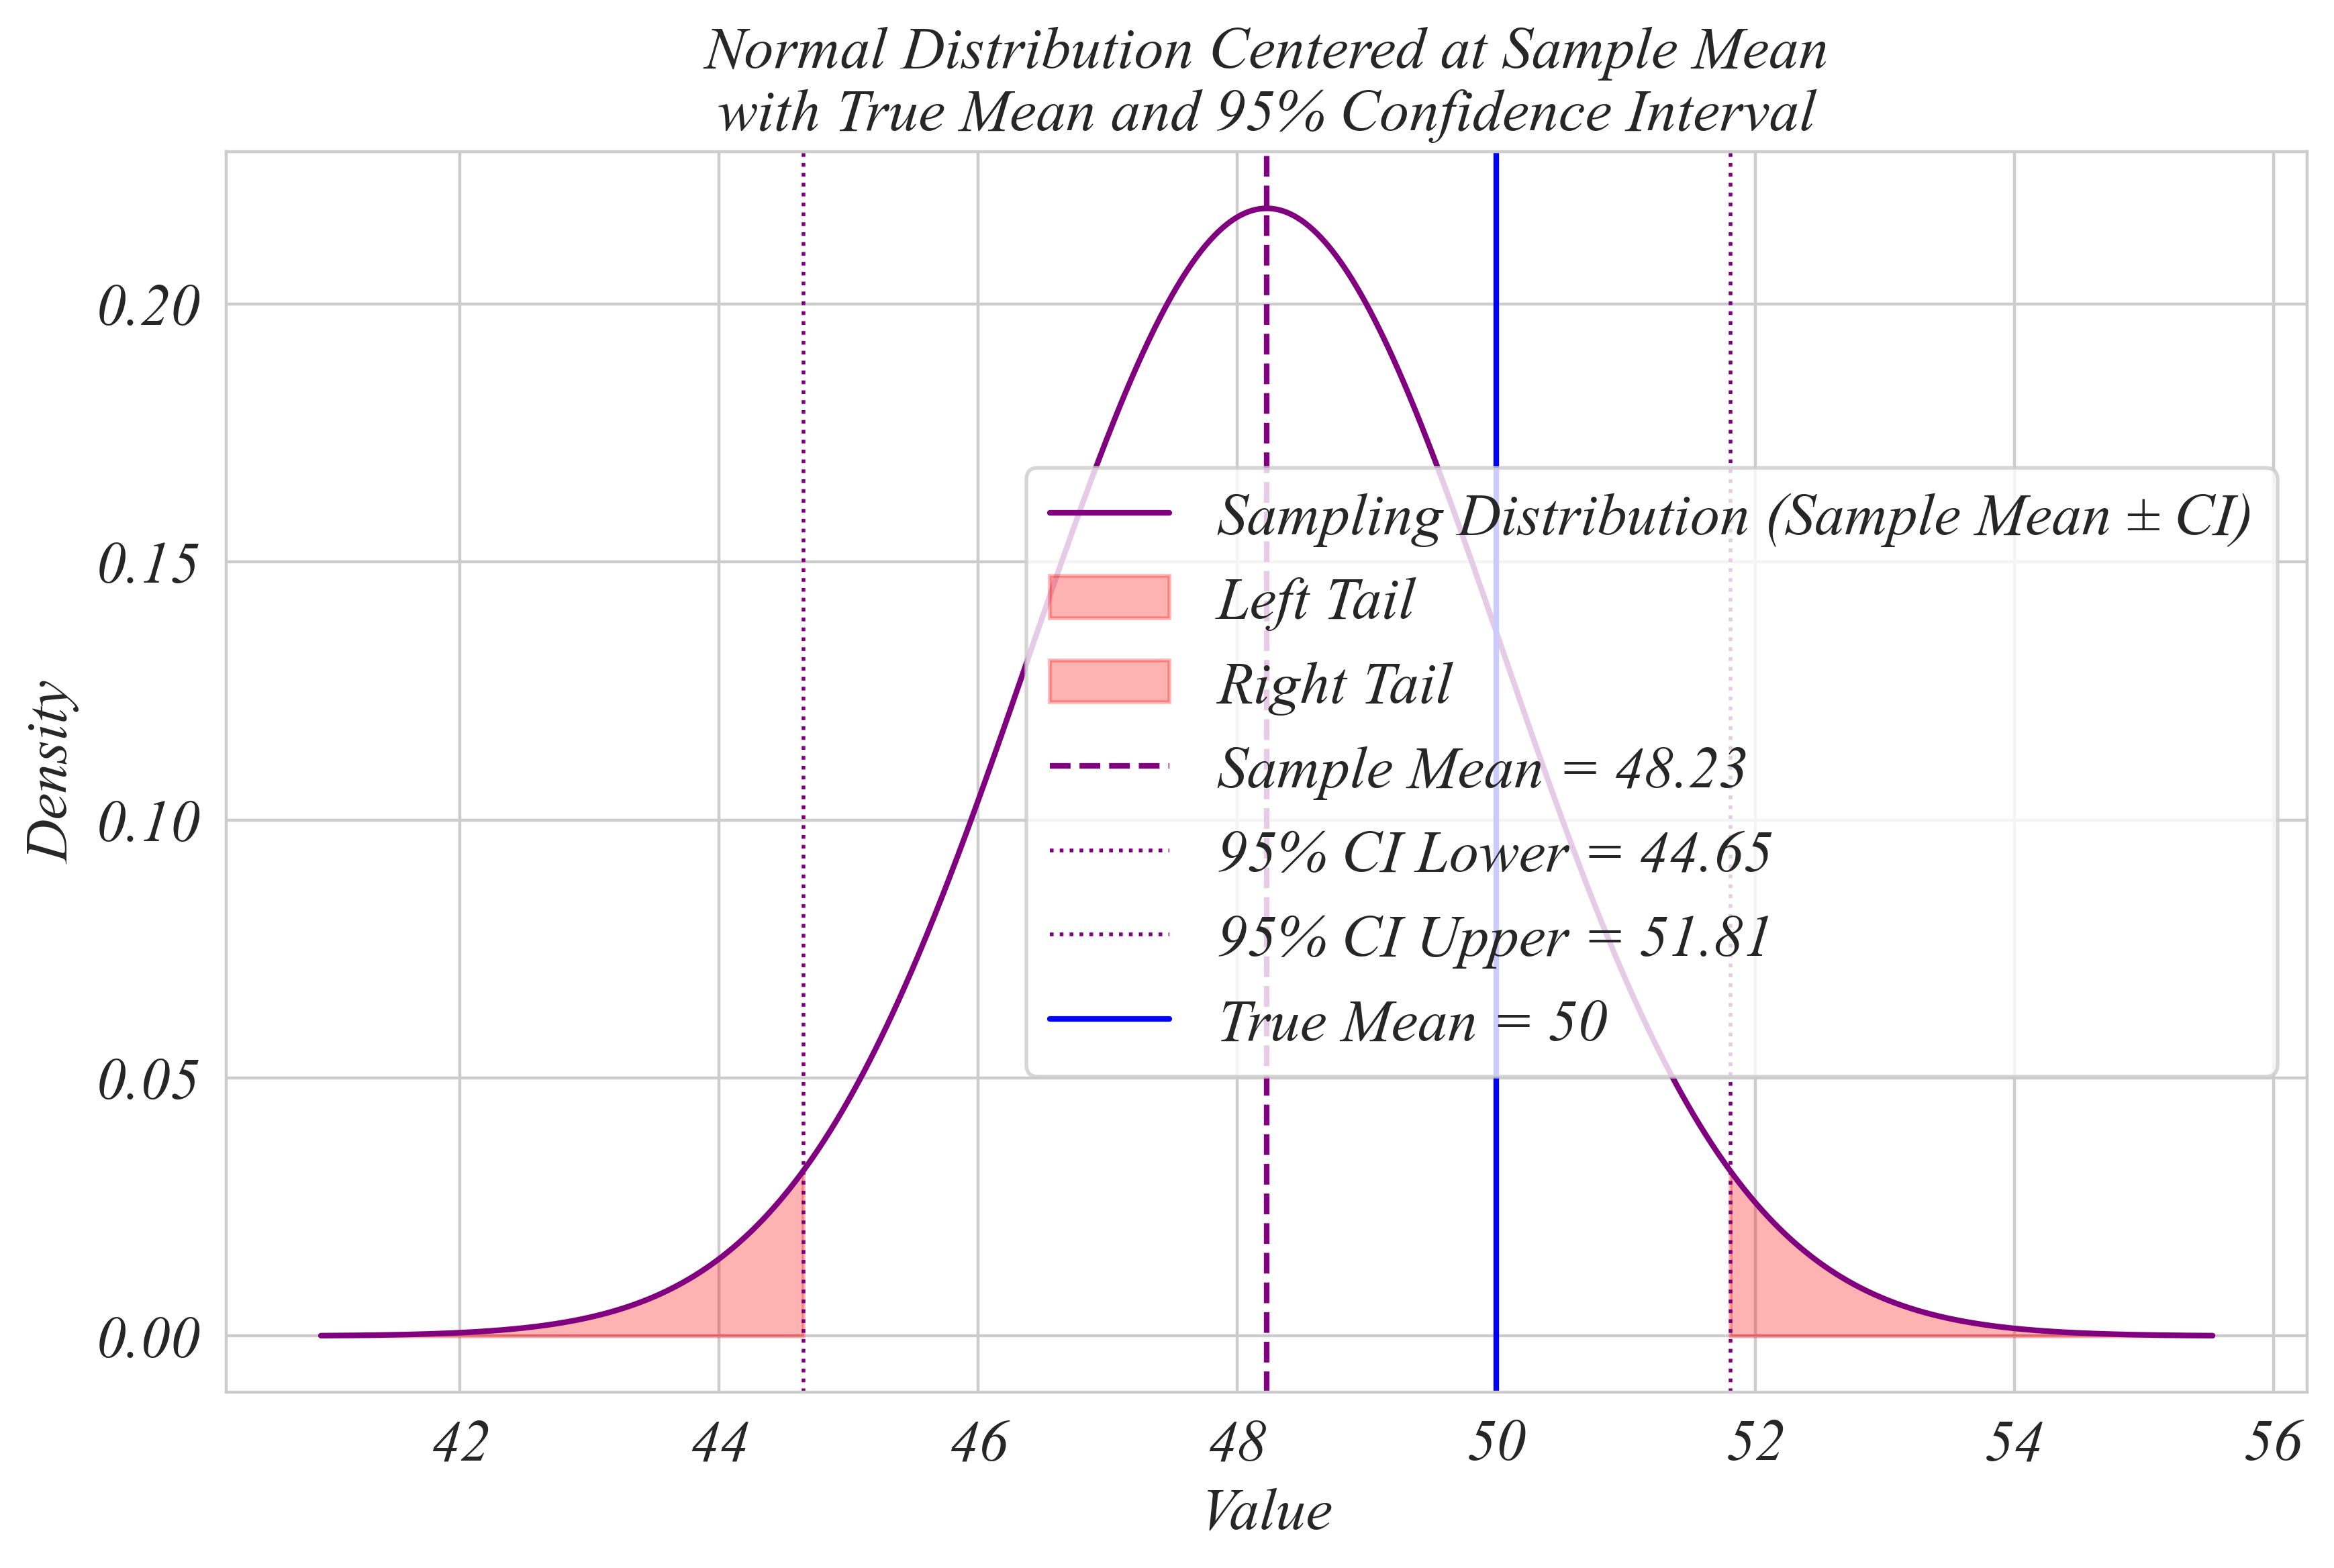

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
population_mean = 50
population_std = 10
sample_size = 30
confidence_level = 0.95
z_score = 1.96  # Approximate Z-score for a 95% confidence level

# Take a single sample and calculate the sample mean and standard error
sample = np.random.normal(population_mean, population_std, sample_size)
sample_mean = np.mean(sample)
sample_std_error = population_std / np.sqrt(sample_size)

# Generate x values for the normal distribution centered around the sample mean
x_values = np.linspace(sample_mean - 4 * sample_std_error, sample_mean + 4 * sample_std_error, 1000)
y_values = norm.pdf(x_values, sample_mean, sample_std_error)

# Calculate confidence interval bounds
lower_bound = sample_mean - z_score * sample_std_error
upper_bound = sample_mean + z_score * sample_std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot the normal distribution around the sample mean
plt.plot(x_values, y_values, label="Sampling Distribution (Sample Mean ± CI)", color="purple")

# Shade the tails
x_left_tail = np.linspace(sample_mean - 4 * sample_std_error, lower_bound, 500)
y_left_tail = norm.pdf(x_left_tail, sample_mean, sample_std_error)
plt.fill_between(x_left_tail, y_left_tail, color="red", alpha=0.3, label="Left Tail")

x_right_tail = np.linspace(upper_bound, sample_mean + 4 * sample_std_error, 500)
y_right_tail = norm.pdf(x_right_tail, sample_mean, sample_std_error)
plt.fill_between(x_right_tail, y_right_tail, color="red", alpha=0.3, label="Right Tail")

# Mark the sample mean and confidence interval bounds
plt.axvline(sample_mean, color="purple", linestyle="--", label=f'Sample Mean = {sample_mean:.2f}')
plt.axvline(lower_bound, color="purple", linestyle=":", linewidth=1, label=f'95% CI Lower = {lower_bound:.2f}')
plt.axvline(upper_bound, color="purple", linestyle=":", linewidth=1, label=f'95% CI Upper = {upper_bound:.2f}')

# Mark the true population mean
plt.axvline(population_mean, color="blue", linestyle="-", label=f'True Mean = {population_mean}', linewidth=1.5)

# Labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Normal Distribution Centered at Sample Mean\nwith True Mean and 95% Confidence Interval")
plt.legend()
plt.show()

## Confidence Intervals

<Figure size 4800x3200 with 0 Axes>

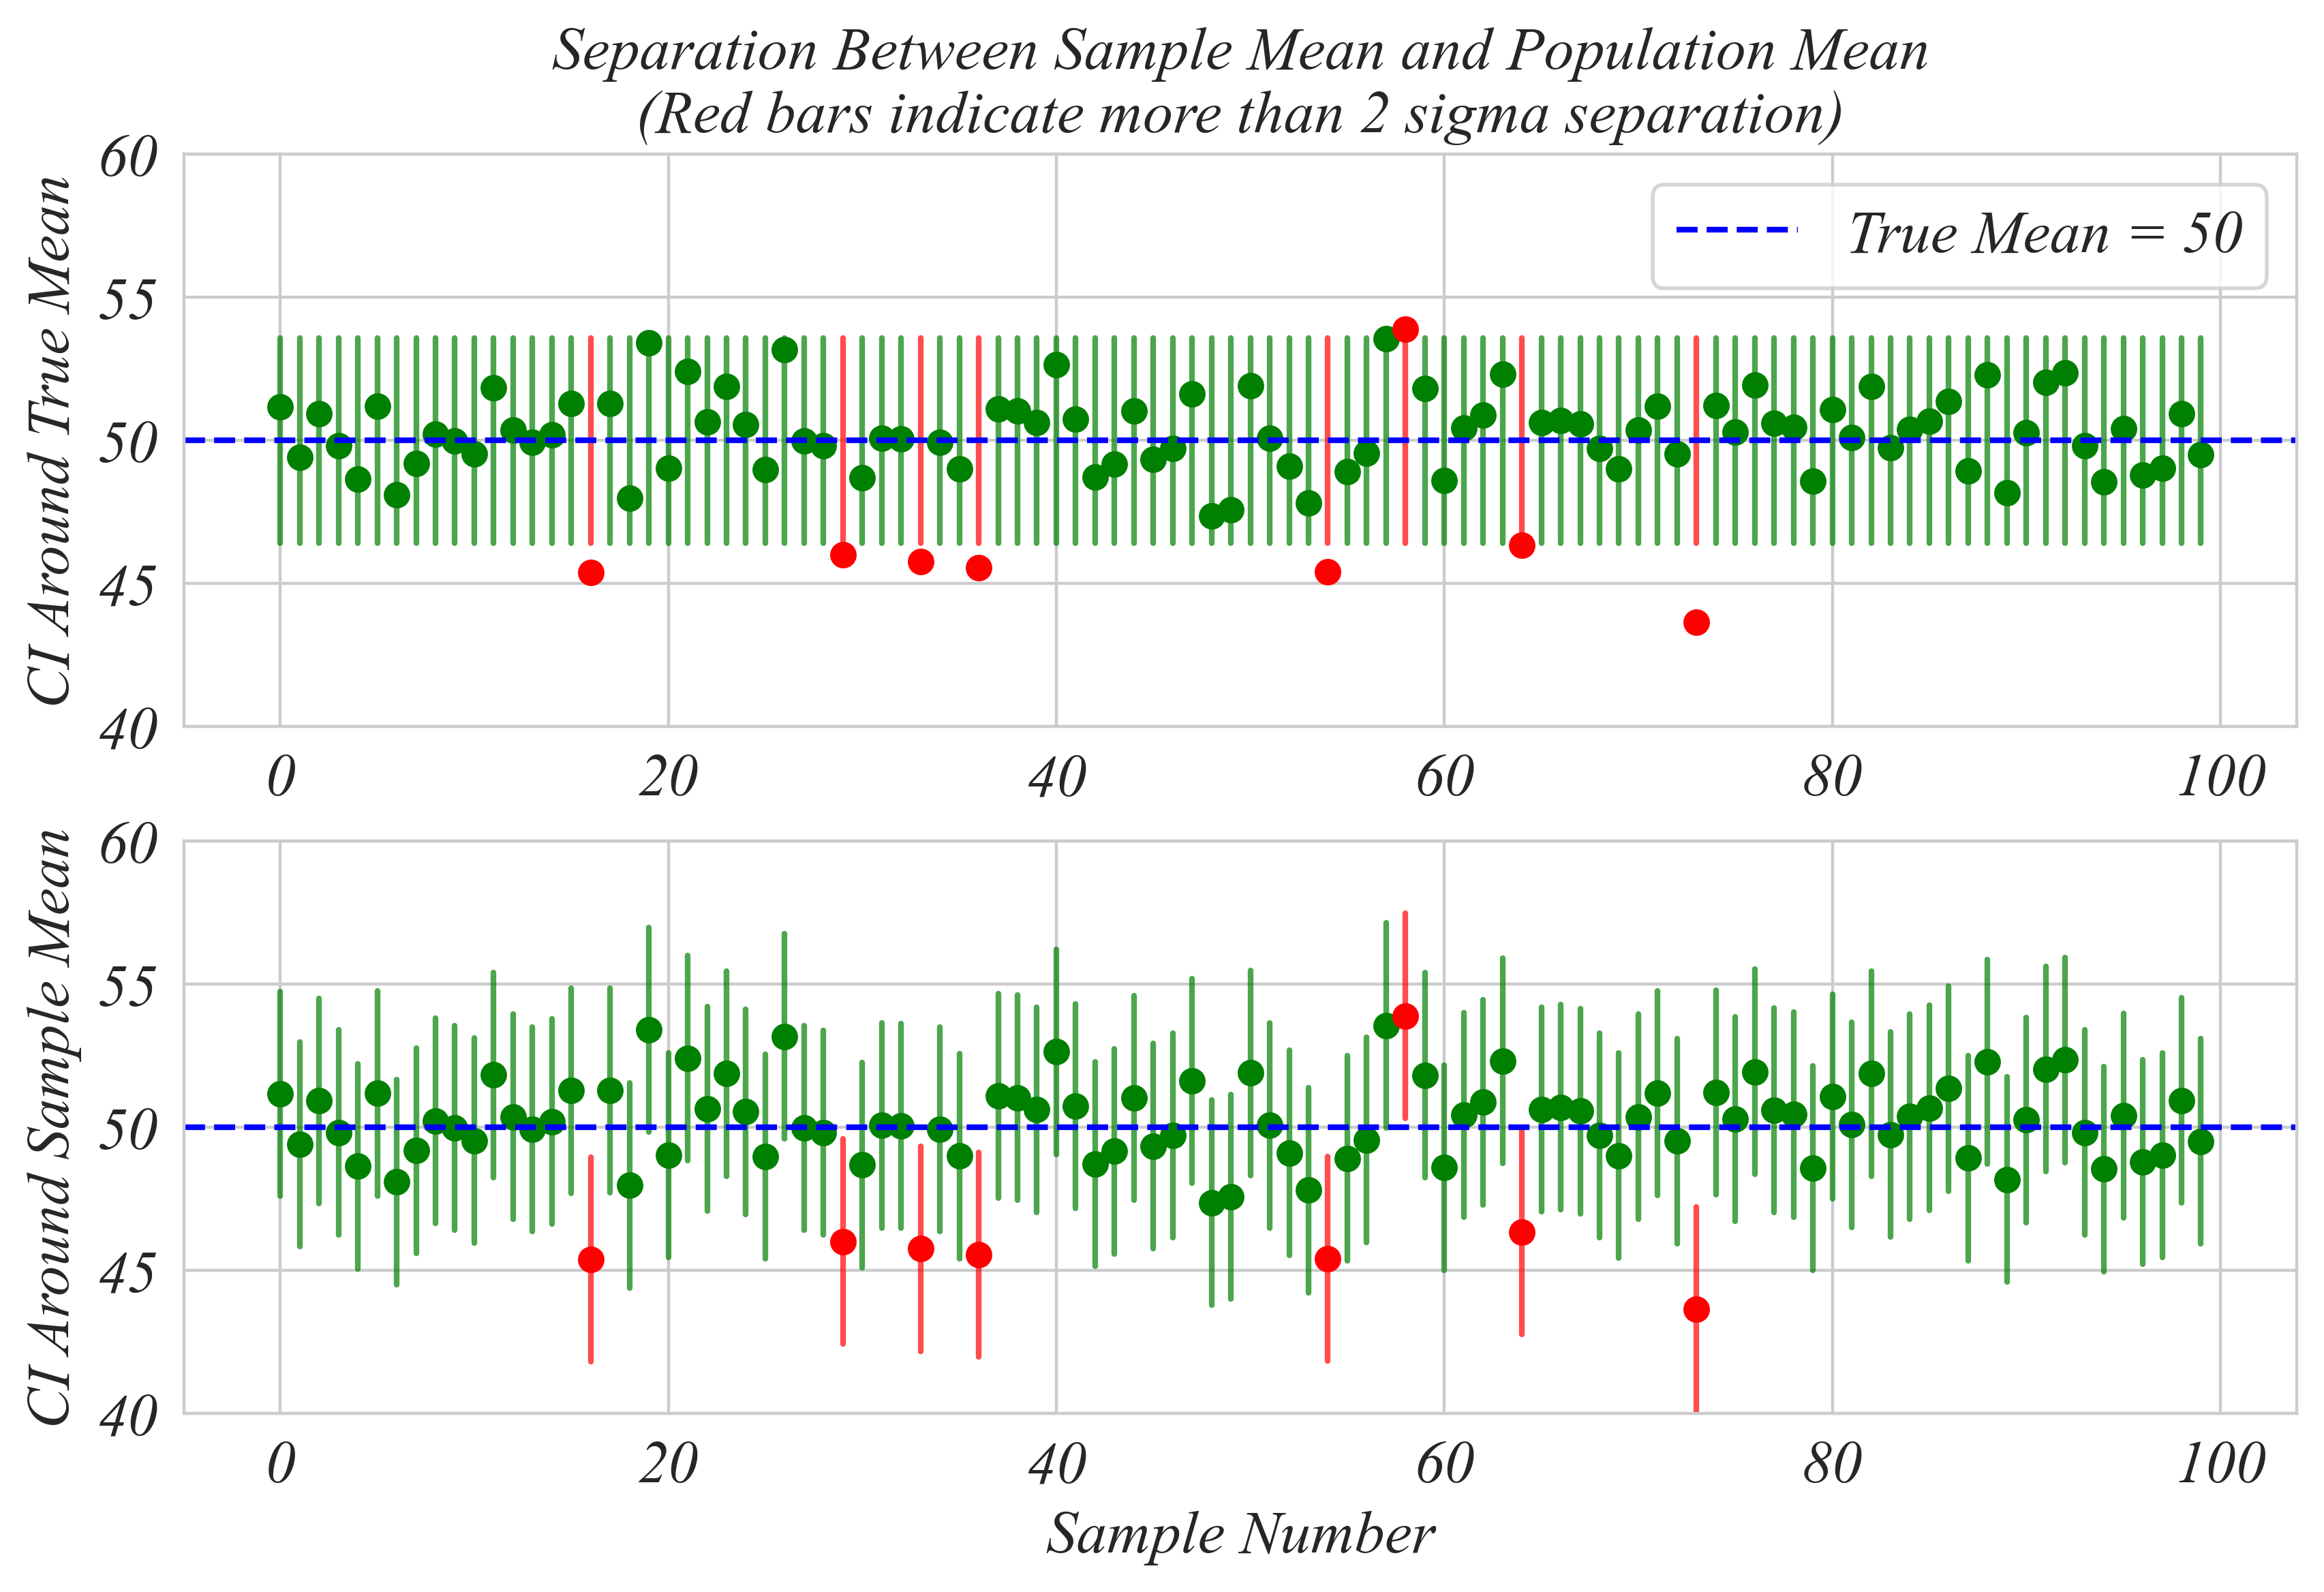

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from Weidman_Figures import *

# Parameters
population_mean = 50
population_std = 10
sample_size = 30
num_samples = 100
confidence_level = 0.95
z_score = 1.96  # Approximate Z-score for a 95% confidence level

# Arrays to store results
sample_means = []
conf_intervals = []
# Generate samples and calculate sample means
for _ in range(num_samples):
    sample = np.random.normal(population_mean, population_std, sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

    # Calculate confidence interval
    lower_bound = sample_mean - z_score * sample_std_error
    upper_bound = sample_mean + z_score * sample_std_error
    conf_intervals.append((lower_bound, upper_bound))

# Calculate confidence interval around the true mean
mean_std_error = population_std / np.sqrt(sample_size)
lower_bound = population_mean - z_score * mean_std_error
upper_bound = population_mean + z_score * mean_std_error

# Plotting
plt.figure(figsize=(12, 8))
fig,ax = Weid_Fig(rows=2, widths=3, height=6, dpi=400)

# Plot vertical bars for confidence interval around the true mean
for i, sample_mean in enumerate(sample_means):
    # Determine the color based on whether the sample mean falls within the confidence interval
    color = 'green'
    color = 'green' if lower_bound <= sample_mean <= upper_bound else 'red'
    
    ax[0].plot([i, i], [lower_bound, upper_bound], color=color, alpha=0.7)  # CI bar
    ax[0].plot(i, sample_mean, 'o', color=color)  # Sample mean point
    
# Plot each sample's confidence interval
for i, (mean, (lower, upper), contains) in enumerate(zip(sample_means, conf_intervals, contains_true_mean)):
    
    color = 'green' if lower <= population_mean <= upper else 'red'
    
    ax[1].plot([i, i], [lower, upper], color=color, alpha=0.7)  # CI line
    ax[1].plot(i, mean, 'o', color=color)  # Sample mean point

# Plot true mean line
ax[0].axhline(population_mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'True Mean = {population_mean}')
ax[1].axhline(population_mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'True Mean = {population_mean}')

# Labels and title
ax[0].set_ylabel('CI Around True Mean')
ax[0].set_ylim(40,60)
ax[1].set_ylabel('CI Around Sample Mean')
ax[1].set_ylim(40,60)
ax[1].set_xlabel('Sample Number')
ax[0].set_title("Separation Between Sample Mean and Population Mean\n(Red bars indicate more than 2 sigma separation)")
ax[0].legend()
plt.savefig('Figures/Confidence_Intervals_Around_Mean.png')

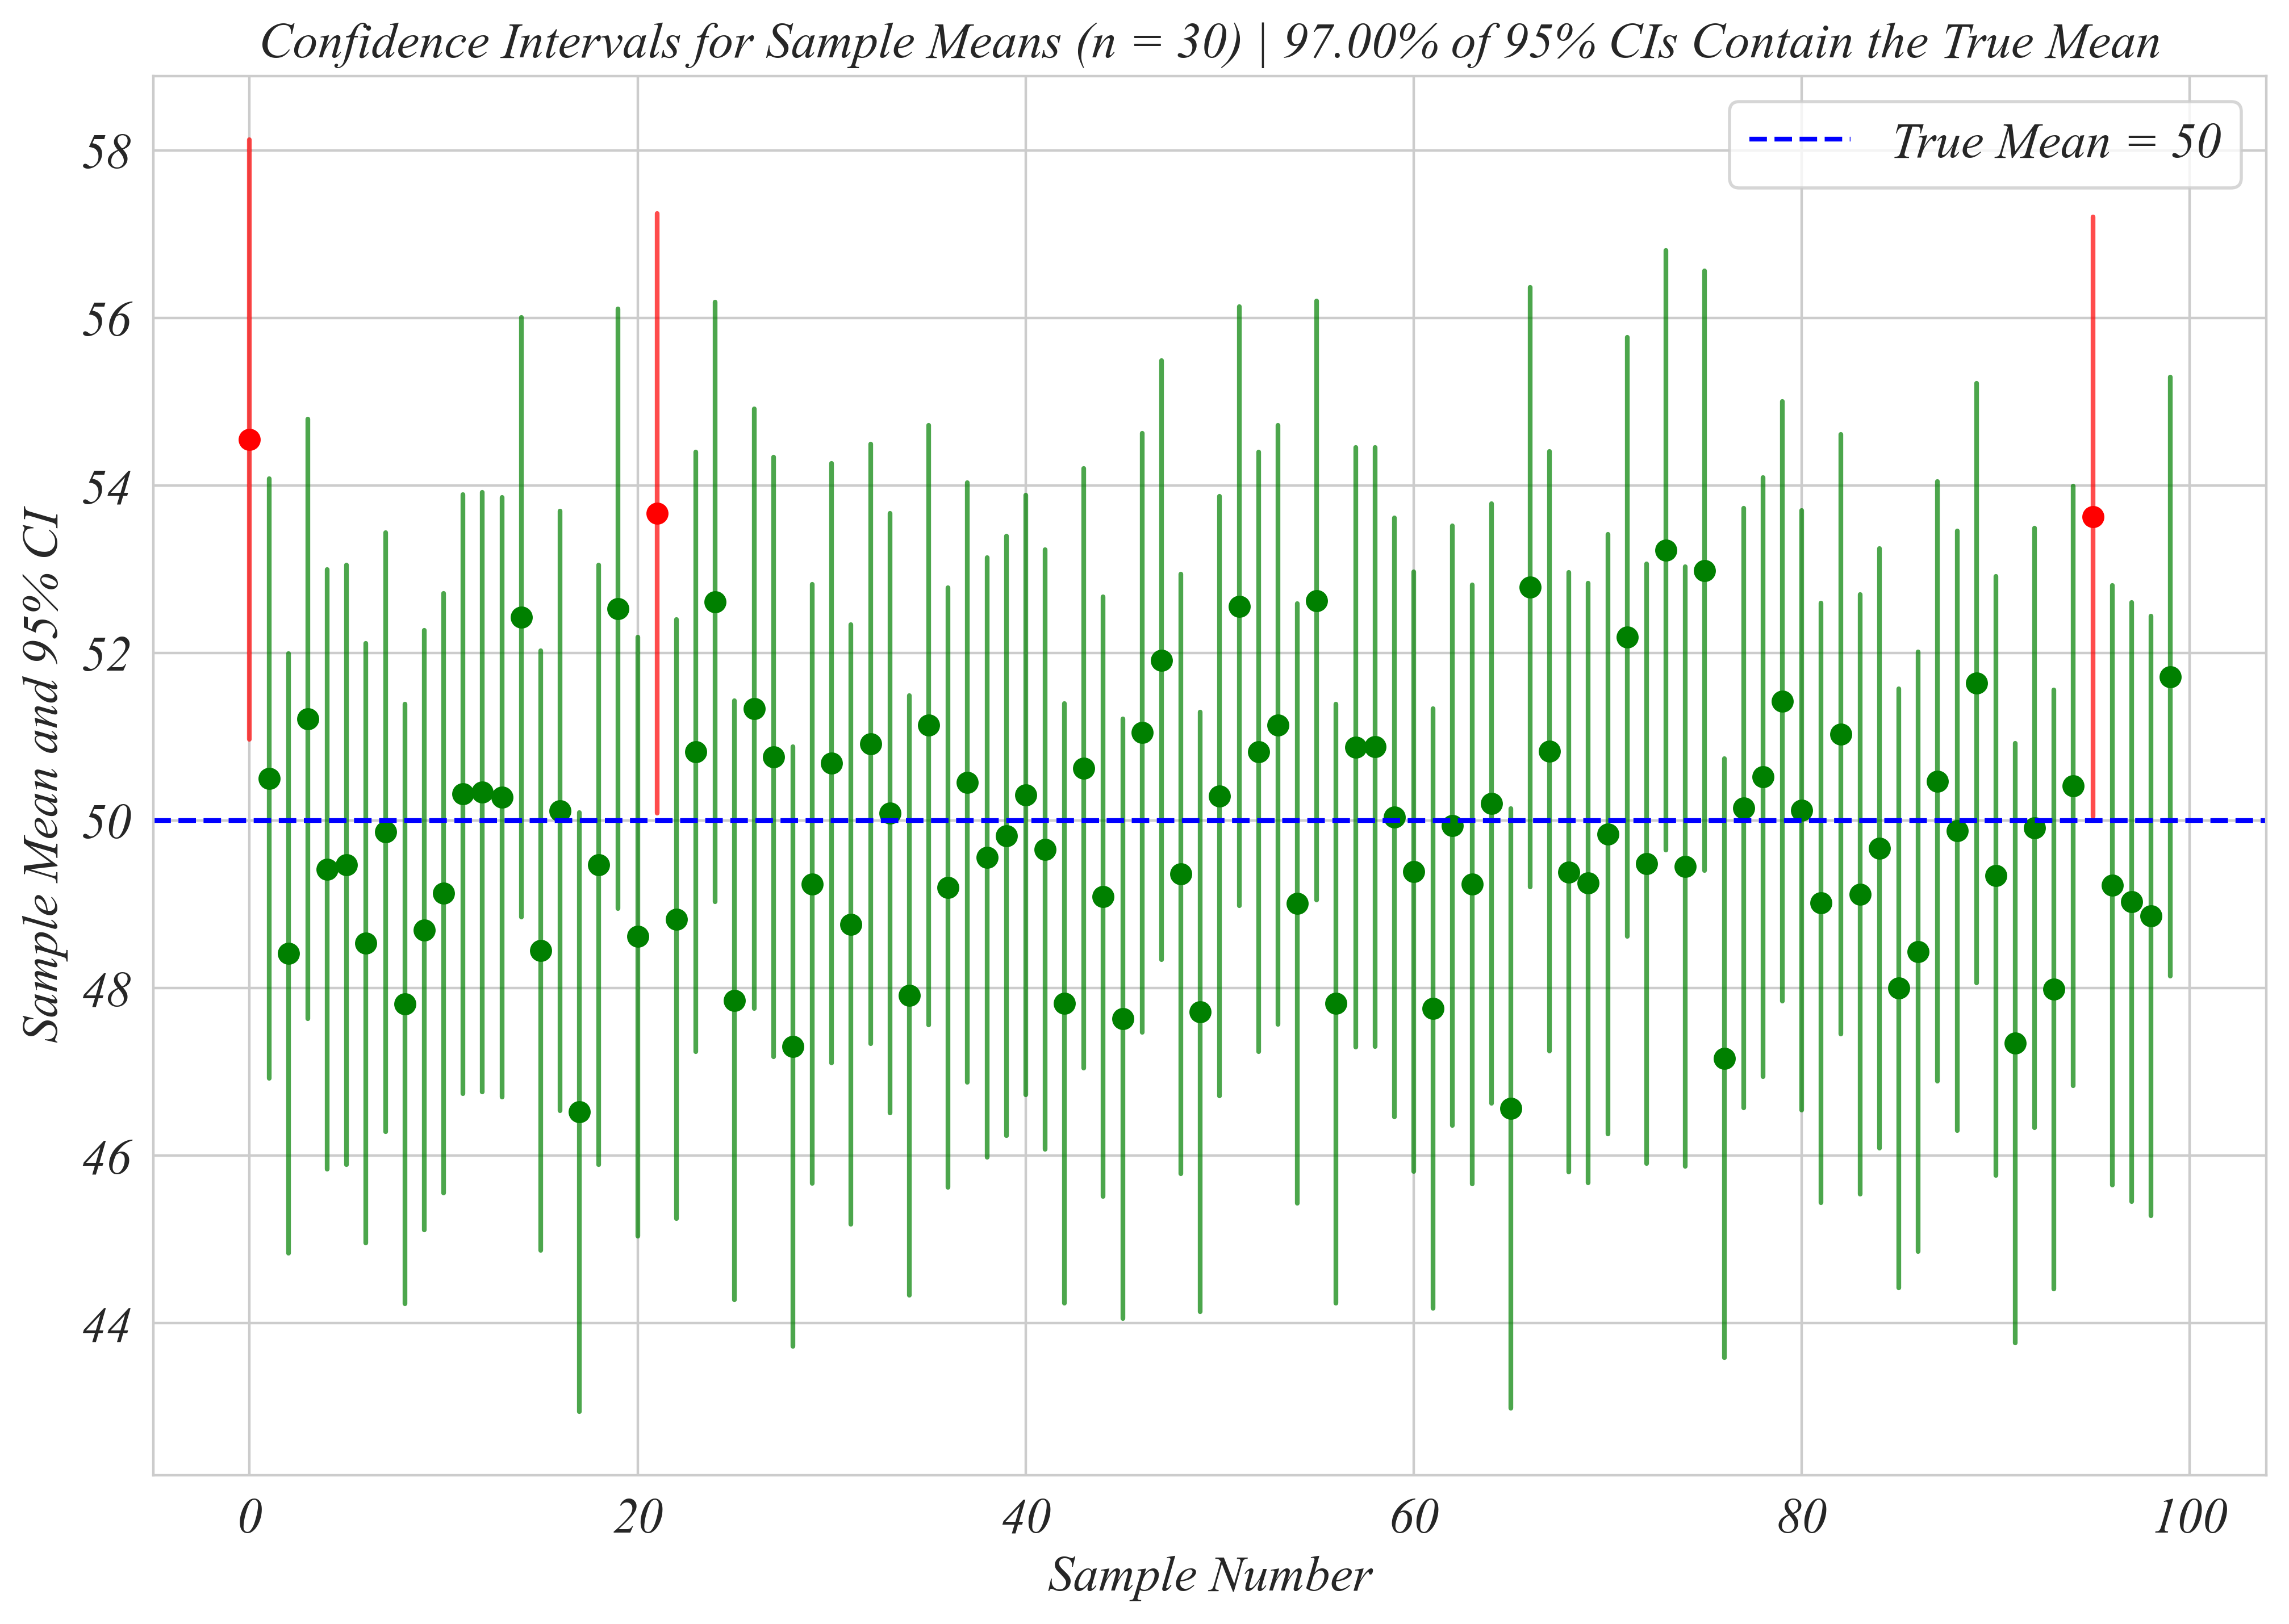

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from Weidman_Figures import *

# Parameters
population_mean = 50
population_std = 10
sample_size = 30
num_samples = 100
confidence_level = 0.95
z_score = 1.96  # Approximate Z-score for a 95% confidence level

# Arrays to store results
sample_means = []
conf_intervals = []
contains_true_mean = []

# Generate samples and calculate sample means and confidence intervals
for _ in range(num_samples):
    sample = np.random.normal(population_mean, population_std, sample_size)
    sample_mean = np.mean(sample)
    sample_std_error = population_std / np.sqrt(sample_size)
    
    # Calculate confidence interval
    lower_bound = sample_mean - z_score * sample_std_error
    upper_bound = sample_mean + z_score * sample_std_error
    sample_means.append(sample_mean)
    conf_intervals.append((lower_bound, upper_bound))
    contains_true_mean.append(lower_bound <= population_mean <= upper_bound)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each sample's confidence interval
for i, (mean, (lower, upper), contains) in enumerate(zip(sample_means, conf_intervals, contains_true_mean)):
    color = 'green' if contains else 'red'
    plt.plot([i, i], [lower, upper], color=color, alpha=0.7)  # CI line
    plt.plot(i, mean, 'o', color=color)  # Sample mean point

# Plot true mean line
plt.axhline(population_mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'True Mean = {population_mean}')

# Labels and title
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean and 95% CI')
plt.title(f"Confidence Intervals for Sample Means (n = {sample_size}) | "
          f"{np.mean(contains_true_mean) * 100:.2f}% of 95% CIs Contain the True Mean")
plt.legend()
plt.savefig('Figures/Confidence_Intervals_Around_Sample_Mean.png')

## Hypothesis Testing

Given this idea, that if we sample repeatedly, using our knowledge about the sampling distribution from the CLT, what can we say about our level of confidence about the true parameter if all we know is the sample?

This is the idea of hypothesis testing! The sampling distribution tells us how often the sample confidence interval will overlap the true parameter if we were to repeatedly sample. 